# This file its to pre-process the main dataset we will use for this project. This are .xlsx files downloaded from IGRAC, containing wells with ground-water information above the time (2015 to 2022) from Gambia. 

### First we make explicit the installation of libraries we will use and the importing.

In [3]:
!pip3 install -q --upgrade pip
!pip3 install -q pandas matplotlib seaborn openpyxl

ERROR: To modify pip, please run the following command:
C:\Program Files\Python312\python.exe -m pip install -q --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

original_data_path = "../../data/original_data/igrac/gambia"
processed_data_path = "../../data/processed_data/igrac"

### We drop some columns that are not usefull and rename another ones.

In [5]:
# Function to load wells data
def load_wells_data(file_path: str) -> pd.DataFrame:
    """Load wells data from an Excel file and drop specified columns."""
    df = pd.read_excel(file_path)
    # Drop the second row (index 1) and specified columns
    df = df.drop(index=0)
    df = df.drop(columns=["Description", "Unnamed: 15", "License", "Address", "Country", 
                          "Unnamed: 11", "Top of well elevation", "Unnamed: 9", 
                          "Feature Type", "Purpose"])
    return df

# Function to load monitoring data
def load_monitoring_data(folder_path: str) -> pd.DataFrame:
    """Load and concatenate all monitoring data from the 'Groundwater Level' sheet in each specified folder's Excel file."""
    all_files = os.listdir(folder_path)
    df_list = []

    for file in all_files:
        if file.endswith('.xlsx') and not file.startswith('~$'):
            try:
                df = pd.read_excel(os.path.join(folder_path, file), sheet_name=0, engine='openpyxl')
                # Drop the second row (index 1) and specified columns
                df = df.drop(index=0)
                df = df.drop(columns=["Unit", "Methodology","Parameter"])
                df_list.append(df)
            except Exception as e:
                print(f"Error loading {file}: {e}")

    if df_list:
        return pd.concat(df_list, ignore_index=True)
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no valid files were found

# Load data
wells_df = load_wells_data(file_path=f'{original_data_path}/wells.xlsx')
monitoring_df = load_monitoring_data(folder_path=f'{original_data_path}/monitoring')

# Remove \n from column names
wells_df.columns = wells_df.columns.str.replace('\n', '')

# Initial inspection
wells_df.to_csv(f'{processed_data_path}/wells_gambia.csv', index=False, encoding='utf-8')
print("Wells Dataframe Head:")
wells_df

Wells Dataframe Head:


,ID,Name,Status,Latitude,Longitude,Ground surface elevation
1,0000058001,Yoro Beri Kunda,Active,13.498482,-14.757303,17.4
2,0000035001,Pakaliba,Active,13.517245,-15.242125,13.34
3,0000024001,Somita,Active,13.208963,-16.298932,27.31
4,0000023001,Taneneh,Active,13.233057,-16.504728,14.32
5,0000020007,Mandinari OB3,Active,13.362761,-16.637219,30.47
6,0000020006,Kerewan OB5,Active,13.36081,-16.625421,23.47
7,0000022001,Baffuloto OB4,Active,13.329997,-16.658777,28.62
8,0000020005,Sinchu Sore OB1,Active,13.384752,-16.679721,25.57
9,0000020009,Wellingara EX1,Active,13.394916,-16.664077,20.48
10,0000000001,Bijilo OB6,Active,13.420804,-16.716666,19.47


### The df above, its the data with the location of each well (48 rows, 48 locations) from all Gambia.

In [7]:
monitoring_df.head()
 # unique values in ID
print("Unique values in ID:")

monitoring_df['ID'].unique()

Unique values in ID:


array(['NWP00001', 'NWP13001', 'NWP20002', 'NWP20003', 'NWP20004',
       'NWP20005', 'NWP20006', 'NWP20007', 'NWP20008', 'NWP20009',
       'NWP20023', 'NWP20024', 'NWP20025', 'NWP21002', 'NWP22002',
       'NWP22003', 'NWP23001', 'NWP24001', 'NWP27001', 'NWP31001',
       'NWP33001', 'NWP35001', 'NWP40001', 'NWP43001', 'NWP45001',
       'NWP50001', 'NWP51001', 'NWP54001', 'NWP54002', 'NWP58001',
       'NWP58002', 'NWP58011', 'NWP60001', 'NWP61001', 'NWP62001',
       'NWP62002'], dtype=object)

In [5]:
# Convertir la columna 'Date and Time' a datetime si aún no lo está
monitoring_df['Date and Time'] = pd.to_datetime(monitoring_df['Date and Time'])

# Extraer el día, mes y año de la columna 'Date and Time'
monitoring_df['Date'] = monitoring_df['Date and Time'].dt.date
monitoring_df['Day'] = monitoring_df['Date and Time'].dt.day
monitoring_df['Month'] = monitoring_df['Date and Time'].dt.month
monitoring_df['Year'] = monitoring_df['Date and Time'].dt.year

# Unir los datasets
combined_df = pd.merge(left=monitoring_df, right=wells_df, left_on='ID', right_on='ID', how='left')
combined_df = combined_df.drop(columns=['Date and Time', 'Name ', 'Status'])
combined_df = combined_df.rename(columns={'Value': 'GROUNDWATER_LEVEL'})  # Rename Value column to GROUNDWATER_LEVEL

# Inspección inicial del DataFrame combinado
combined_df.to_csv(f'{processed_data_path}/igrac_gambia.csv', index=False, encoding='utf-8')

combined_df

,ID,GROUNDWATER_LEVEL,Date,Day,Month,Year,Latitude,Longitude,Ground surface elevation
0,NWP00001,14.26,2016-04-14,14,4,2016,13.420804,-16.716666,19.47
1,NWP00001,13.82,2015-12-26,26,12,2015,13.420804,-16.716666,19.47
2,NWP00001,13.83,2015-12-26,26,12,2015,13.420804,-16.716666,19.47
3,NWP00001,13.82,2015-12-25,25,12,2015,13.420804,-16.716666,19.47
4,NWP00001,13.82,2015-12-25,25,12,2015,13.420804,-16.716666,19.47
...,...,...,...,...,...,...,...,...,...
25401,NWP62002,28.9,2015-12-29,29,12,2015,13.425272,-14.206073,36.35
25402,NWP62002,29.19,2015-09-29,29,9,2015,13.425272,-14.206073,36.35
25403,NWP62002,29.59,2015-07-29,29,7,2015,13.425272,-14.206073,36.35
25404,NWP62002,29.44,2015-05-29,29,5,2015,13.425272,-14.206073,36.35


### The df above its the data from the differents locations (wells) but with information over the time (2015 to 2022), showing information about the ground-water level. This is important to understand how may change the level above time and usage

In [25]:
# Function to summarize DataFrame columns excluding 'ID'
def summarize_dataframe(df: pd.DataFrame):
    """Generate a summary for each column in the DataFrame excluding 'ID' including unique values and missing values."""
    summary = {'row_count': len(df)}  # Include the row count in the summary
    for column in df.columns:
        unique_values_count = df[column].nunique()
        missing_values = df[column].isnull().sum()
        summary[column] = {
            'unique_values_count': unique_values_count,
            'missing_values': missing_values,
            'missing_values_percent': (missing_values / summary['row_count'] * 100).round(2)
        }
    return summary

# Function to print summary
def print_summary(df_summary, df_name):
    print('')
    print('-------------------------')
    print('')
    print(f"{df_name} Data Summary:")
    print(f"Total rows: {df_summary['row_count']}")
    for col, stats in df_summary.items():
        if col == 'row_count':  # Skip row count in the column details
            continue
        print(f"\nColumn: {col} | Unique Values: {stats['unique_values_count']} | Missing Values: {stats['missing_values_percent']}%")

# Summarize wells data
wells_summary = summarize_dataframe(wells_df)
# Summarize monitoring data
monitoring_summary = summarize_dataframe(monitoring_df)

# Display summary for wells data
print_summary(wells_summary, "Wells")
# Display summary for monitoring data
print_summary(monitoring_summary, "Monitoring")




-------------------------

Wells Data Summary:
Total rows: 47

Column: ID | Unique Values: 47 | Missing Values: 0.0%

Column: Name  | Unique Values: 38 | Missing Values: 0.0%

Column: Status | Unique Values: 2 | Missing Values: 0.0%

Column: Latitude | Unique Values: 45 | Missing Values: 0.0%

Column: Longitude | Unique Values: 40 | Missing Values: 0.0%

Column: Ground surface elevation
 | Unique Values: 36 | Missing Values: 0.0%

-------------------------

Monitoring Data Summary:
Total rows: 25406

Column: ID | Unique Values: 36 | Missing Values: 0.0%

Column: Date and Time | Unique Values: 5461 | Missing Values: 0.0%

Column: Value | Unique Values: 1713 | Missing Values: 0.0%

Column: Date | Unique Values: 1348 | Missing Values: 0.0%

Column: Day | Unique Values: 31 | Missing Values: 0.0%

Column: Month | Unique Values: 12 | Missing Values: 0.0%

Column: Year | Unique Values: 6 | Missing Values: 0.0%


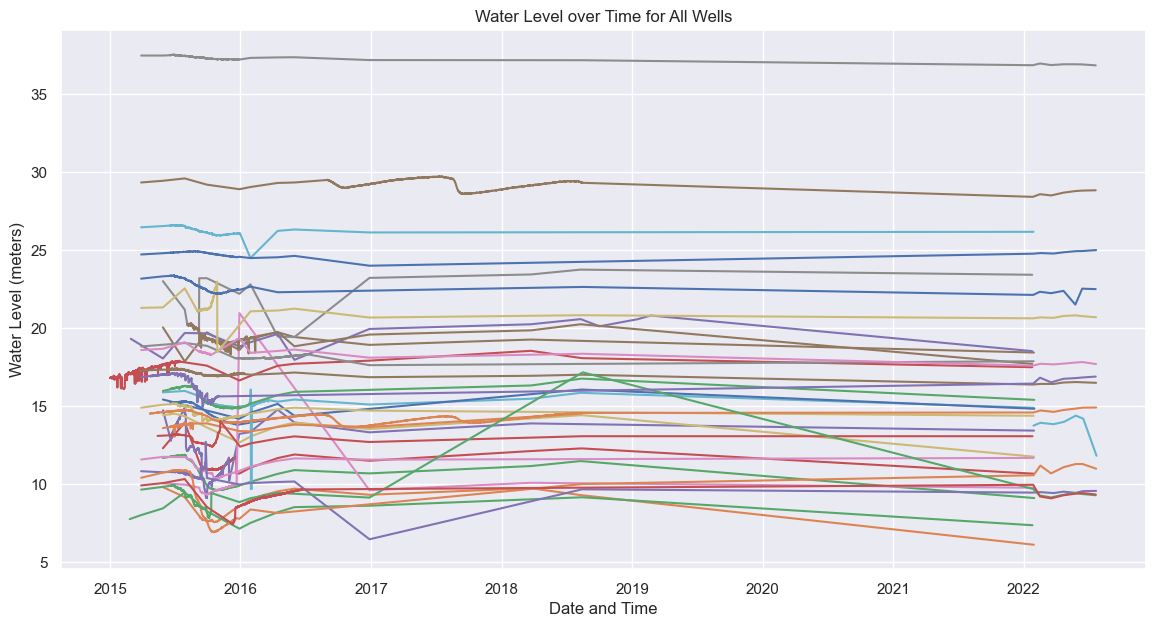

In [26]:
# Make sure 'Date and Time' is a datetime column
monitoring_df['Date and Time'] = pd.to_datetime(monitoring_df['Date and Time'])

# Set the style for seaborn
sns.set(style="darkgrid")

def plot_all_wells(monitoring_data: pd.DataFrame):
    """
    Plot the time series data for all well IDs without showing the legend.
    
    :param monitoring_data: The DataFrame containing the monitoring data.
    """
    plt.figure(figsize=(14, 7))

    # Group by 'ID' and plot each group
    for well_id, group in monitoring_data.groupby('ID'):
        plt.plot(group['Date and Time'], group['Value'], marker='', linestyle='-')
    
    plt.title('Water Level over Time for All Wells')
    plt.xlabel('Date and Time')
    plt.ylabel('Water Level (meters)')
    # Omitting the plt.legend() call to not display the legend
    plt.show()

# Call the function to plot data for all wells
plot_all_wells(monitoring_data=monitoring_df)

### Each line of the graph above represent a wells and his variation of Water Level over the time.

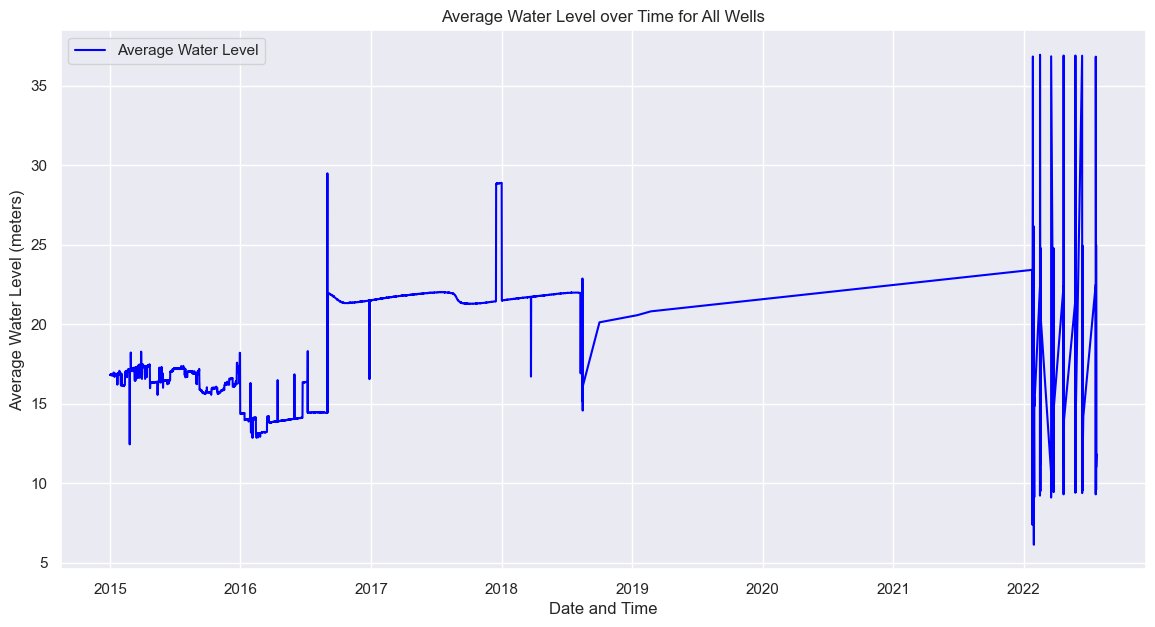

In [7]:
# Make sure 'Date and Time' is a datetime column
monitoring_df['Date and Time'] = pd.to_datetime(monitoring_df['Date and Time'])

# Set the style for seaborn
sns.set(style="darkgrid")

def plot_average_well_data(monitoring_data: pd.DataFrame):
    """
    Plot the average water level over time for all wells.
    
    :param monitoring_data: The DataFrame containing the monitoring data.
    """
    # Group by 'Date and Time' and calculate the mean of 'Value' for each group
    average_data = monitoring_data.groupby('Date and Time')['Value'].mean().reset_index()

    # Plot the average data
    plt.figure(figsize=(14, 7))
    plt.plot(average_data['Date and Time'], average_data['Value'], marker='', linestyle='-', color='blue', label='Average Water Level')
    
    plt.title('Average Water Level over Time for All Wells')
    plt.xlabel('Date and Time')
    plt.ylabel('Average Water Level (meters)')
    plt.legend()
    plt.show()

# Call the function to plot the average water level over time for all wells
plot_average_well_data(monitoring_data=monitoring_df)

### In this graph above its the combination (mean) of the water level of all the wells over time. 

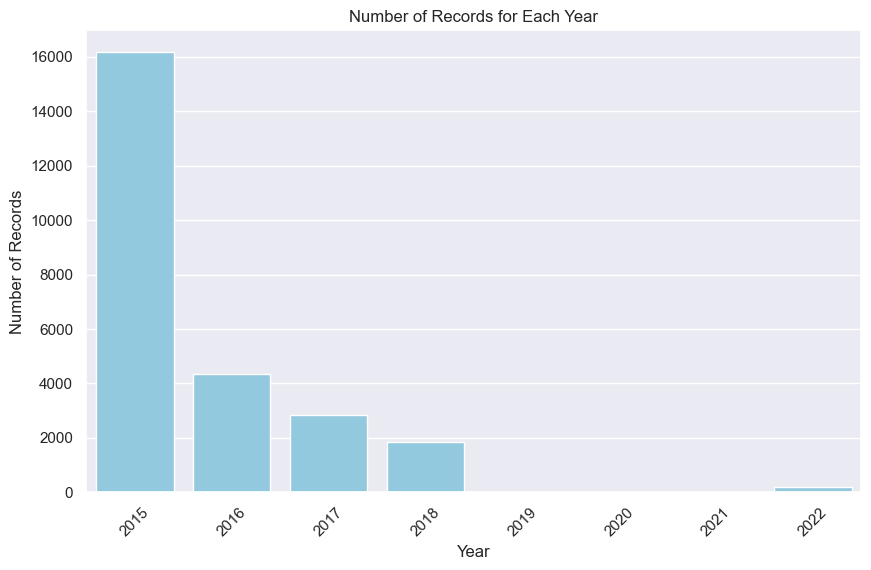

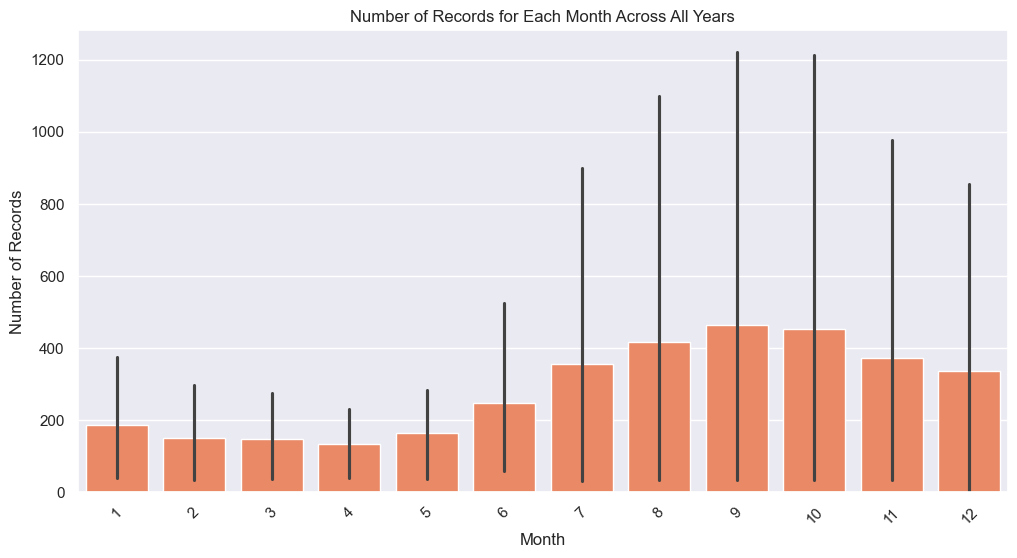

In [27]:
# Ensure 'Date and Time' is a datetime column
monitoring_df['Date and Time'] = pd.to_datetime(monitoring_df['Date and Time'])

# Set 'Date and Time' as the index of the DataFrame
monitoring_df.set_index('Date and Time', inplace=True)

# Count the number of records for each year
annual_counts = monitoring_df.resample('Y').size()

# Count the number of records for each month across all years
monthly_counts = monitoring_df.resample('M').size()

# Plot the number of records for each year
plt.figure(figsize=(10, 6))
sns.barplot(x=annual_counts.index.year, y=annual_counts.values, color='skyblue')
plt.title('Number of Records for Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)  # Rotate the x labels to show clearly
plt.show()

# Plot the number of records for each month across all years
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index.month, y=monthly_counts.values, color='coral')
plt.title('Number of Records for Each Month Across All Years')
plt.xlabel('Month')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)  # Rotate the x labels to show clearly
plt.show()

### In the two graphs above we can see from when we have more data. It shows that most of the data its from 2015 and 2016. And then we dont have any data from 2019, 2021 and 2022.
### Also we can see that some months (july, agoust, october, september and november) where when most data was collected. 

In [9]:
# Create a DataFrame with year and month columns
monitoring_df['Year'] = monitoring_df.index.year
monitoring_df['Month'] = monitoring_df.index.month

# Group by year and month and count the records
monthly_counts_by_year = monitoring_df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Now you can plot this data or inspect it
print(monthly_counts_by_year)

    Year  Month  Count
0   2015      1    123
1   2015      2    113
2   2015      3    141
3   2015      4    184
4   2015      5    400
5   2015      6   1158
6   2015      7   2181
7   2015      8   2402
8   2015      9   2769
9   2015     10   2669
10  2015     11   2121
11  2015     12   1907
12  2016      1    813
13  2016      2    624
14  2016      3    508
15  2016      4    390
16  2016      5    398
17  2016      6    327
18  2016      7    151
19  2016      8    129
20  2016      9    240
21  2016     10    248
22  2016     11    240
23  2016     12    274
24  2017      1    248
25  2017      2    224
26  2017      3    248
27  2017      4    240
28  2017      5    248
29  2017      6    240
30  2017      7    248
31  2017      8    248
32  2017      9    240
33  2017     10    248
34  2017     11    240
35  2017     12    185
36  2018      1    247
37  2018      2    224
38  2018      3    261
39  2018      4    240
40  2018      5    248
41  2018      6    240
42  2018   